In [1]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
import DNSmodule as dns

params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.style.use('ggplot')

In [2]:
files = glob('new_WN_test_varying_resol/WN*b_*spc')

ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus,lbs,viscs, Pms, Ns, kps = dns.get_data_MHD(files)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs, viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)
print(files)
idx_sort = np.argsort(kps)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs,lus,lbs,viscs, Pms, Ns, kps, files, idx_sort)


['new_WN_test_varying_resol/WN5.b_2048_0.0004_1.spc'
 'new_WN_test_varying_resol/WN20.b_2048_0.0004_1.spc'
 'new_WN_test_varying_resol/WN100.b_4096_0.0004_1.spc'
 'new_WN_test_varying_resol/WN5.b_1024_0.0009_1.spc'
 'new_WN_test_varying_resol/WN100.b_4096_0.0009_1.spc'
 'new_WN_test_varying_resol/WN20.b_2048_0.0009_1.spc'
 'new_WN_test_varying_resol/WN20.b_2048_0.001_1.spc'
 'new_WN_test_varying_resol/WN100.b_4096_0.001_1.spc'
 'new_WN_test_varying_resol/WN20.b_2048_0.003_1.spc'
 'new_WN_test_varying_resol/WN100.b_4096_0.003_1.spc'
 'new_WN_test_varying_resol/WN5.b_1024_0.003_1.spc'
 'new_WN_test_varying_resol/WN100.b_4096_0.006_1.spc'
 'new_WN_test_varying_resol/WN5.b_1024_0.006_1.spc'
 'new_WN_test_varying_resol/WN20.b_1024_0.006_1.spc'
 'new_WN_test_varying_resol/WN100.b_4096_0.009_1.spc'
 'new_WN_test_varying_resol/WN5.b_1024_0.009_1.spc'
 'new_WN_test_varying_resol/WN20.b_1024_0.009_1.spc']


# Comparing different k_peaks and different viscs with Pm=1

In [4]:
files

array(['new_WN_test_varying_resol/WN5.b_2048_0.0004_1.spc',
       'new_WN_test_varying_resol/WN5.b_1024_0.006_1.spc',
       'new_WN_test_varying_resol/WN5.b_1024_0.0009_1.spc',
       'new_WN_test_varying_resol/WN5.b_1024_0.003_1.spc',
       'new_WN_test_varying_resol/WN5.b_1024_0.009_1.spc',
       'new_WN_test_varying_resol/WN20.b_1024_0.006_1.spc',
       'new_WN_test_varying_resol/WN20.b_2048_0.003_1.spc',
       'new_WN_test_varying_resol/WN20.b_2048_0.0009_1.spc',
       'new_WN_test_varying_resol/WN20.b_2048_0.0004_1.spc',
       'new_WN_test_varying_resol/WN20.b_2048_0.001_1.spc',
       'new_WN_test_varying_resol/WN20.b_1024_0.009_1.spc',
       'new_WN_test_varying_resol/WN100.b_4096_0.001_1.spc',
       'new_WN_test_varying_resol/WN100.b_4096_0.003_1.spc',
       'new_WN_test_varying_resol/WN100.b_4096_0.0009_1.spc',
       'new_WN_test_varying_resol/WN100.b_4096_0.006_1.spc',
       'new_WN_test_varying_resol/WN100.b_4096_0.0004_1.spc',
       'new_WN_test_varying_resol/

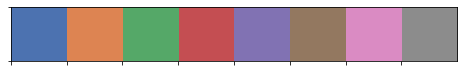

In [9]:
sns.palplot(sns.color_palette('deep',8))

In [3]:

for id_f, f in enumerate(files):
    Lu = Lus[id_f]
    U = Us[id_f]
    visc = viscs[id_f]
    kp = kps[id_f]
    T = Lu/U
    print('T ={:.3f} \t kp = {} \t visc = {}'.format(T[0],kp,visc))

T =0.780 	 kp = 5.0 	 visc = 0.0004
T =0.780 	 kp = 5.0 	 visc = 0.006
T =0.780 	 kp = 5.0 	 visc = 0.0009
T =0.780 	 kp = 5.0 	 visc = 0.003
T =0.780 	 kp = 5.0 	 visc = 0.009
T =0.195 	 kp = 20.0 	 visc = 0.006
T =0.195 	 kp = 20.0 	 visc = 0.003
T =0.195 	 kp = 20.0 	 visc = 0.0009
T =0.195 	 kp = 20.0 	 visc = 0.0004
T =0.195 	 kp = 20.0 	 visc = 0.001
T =0.195 	 kp = 20.0 	 visc = 0.009
T =0.039 	 kp = 100.0 	 visc = 0.001
T =0.039 	 kp = 100.0 	 visc = 0.003
T =0.039 	 kp = 100.0 	 visc = 0.0009
T =0.039 	 kp = 100.0 	 visc = 0.006
T =0.039 	 kp = 100.0 	 visc = 0.0004
T =0.039 	 kp = 100.0 	 visc = 0.009


In [7]:
#assign colors depending on the different kp values

tags = [int(kp) if kp.is_integer() else kp for kp in kps]
ls = ['-' for i in range(len(files))]
colors = []
linestyles = []
markers = []
_colors = sns.color_palette('deep',8)
for kp in kps:
    if kp == 5:
        colors.append(_colors[0])
        linestyles.append('-.')     
        markers.append('s')
    elif kp == 20:
        colors.append(_colors[2])
        linestyles.append('-')     
        markers.append('^')
    else:
        colors.append(_colors[3])
        linestyles.append('--')     
        markers.append('o')

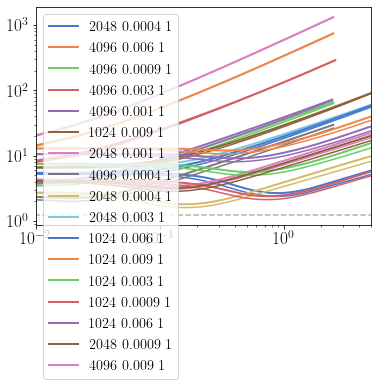

In [12]:
resolution_check(files)

In [8]:
t_T_select = 36

T0s = []
id_t_T = []
for idx, f in enumerate(files):
    Lu = Lus[idx]
    U = Us[idx]
    T0s.append(Lu[0]/U[0])
np.array(T0s)

for idx, f in enumerate(files):
    time = times[idx]
    T0 = T0s[idx]

    for id_t, t_T in enumerate(time/T0):
        if t_T_select > 36:
            id_t_T.append(id_t)
            break
t = []
for _id_t_T in id_t_T:
    t.append([0,_id_t_T])

In [ ]:
## id_t_T is the largest t/T we get that is common for all simulations in this set

kp= 5.0, visc=0.0004, t/T = 36.005801848949865
kp= 5.0, visc=0.006, t/T = 36.00595966410191
kp= 5.0, visc=0.0009, t/T = 36.00595966410191
kp= 5.0, visc=0.003, t/T = 36.00595966410191
kp= 5.0, visc=0.009, t/T = 36.00595966410191
kp= 20.0, visc=0.006, t/T = 36.01040864496676
kp= 20.0, visc=0.003, t/T = 36.010390316273885
kp= 20.0, visc=0.0009, t/T = 36.01038584243574
kp= 20.0, visc=0.0004, t/T = 36.01038584243574
kp= 20.0, visc=0.001, t/T = 36.010390316273885
kp= 20.0, visc=0.009, t/T = 36.01040864496676
kp= 100.0, visc=0.001, t/T = 36.164245845868884
kp= 100.0, visc=0.003, t/T = 36.164245845868884
kp= 100.0, visc=0.0009, t/T = 36.164245845868884
kp= 100.0, visc=0.006, t/T = 36.164245845868884
kp= 100.0, visc=0.0004, t/T = 36.164245845868884
kp= 100.0, visc=0.009, t/T = 36.164245845868884


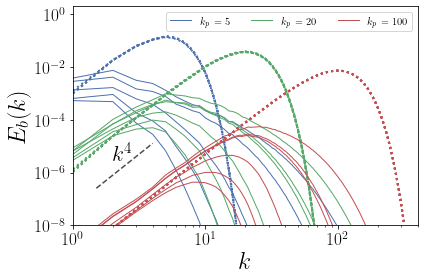

In [59]:
# Produce spectrum evolution Hardcoded times and label starting index
fig, ax = plt.subplots()
t = []
for _id_t_T in id_t_T:
    t.append([0,_id_t_T])
    
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    visc = viscs[idx]
    kp = kps[idx]
    Lu = Lus[idx]
    U = Us[idx]
    T0 = T0s[idx]
    print('kp= {}, visc={}, t/T = {}'.format(kp,visc,time[t[idx][1]]/T0))

    
    
    for idx_t in t[idx]:
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=colors[idx],lw=2,ls=':',)
        else:
            if idx in [0,6,12]:
                ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='$k_p$ = {}'.format(int(kp)))
            else:
                ax.plot(k,Bk[idx_t],c=colors[idx],lw = 1,label ='__nolegend__')
k_slope = np.array([1.5,4])
ax.plot(k_slope,5e-8*np.power(k_slope,4),c='0.3',ls='--')
ax.text(2,3e-6,'$k^{4}$',size=22)
k2_slope = np.array([10,40])
#ax.plot(k2_slope,7e-3*np.power(k_slope,-2),c='0.3',ls='-')
#ax.plot(k2_slope,5e-2*np.power(k_slope,-3/2),c='0.3',ls='--')
#ax.plot(k2_slope,5e-1*np.power(k_slope,-5/3),c='0.3',ls=':')
#ax.text(30,3e-2,'$k^{-2}$',size=22)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('$E_b(k)$',fontsize=24)
ax.set_xlabel('$k$',fontsize=24)
ax.set_ylim(1e-8,2)
ax.set_xlim(1,400)
ax.legend(loc=1,ncol=3,fontsize=10.5)
fig.tight_layout()
#fig.savefig('Spectrum.pdf',format='pdf')

In [60]:
import pandas as pd

In [65]:
Res = []
k_maxs = []
NHs = []
for id_f,f in enumerate(files):
    Res.append(int(Us[idx][0]*Lus[id_f][0]/viscs[id_f]))
    k_maxs.append(ks[id_f][-1])
    NHs.append('NH\textsubscript{$k_p$}')


df= pd.DataFrame({'Run':NHs,'$P_m$': Pms,'$\\nu$': viscs,'$Re$': Res,'$k_p$': kps.astype(int), '$N$':Ns})
df = df.round({'$\\nu$': 5,'$Re$': 1,'$P_m$': 5,'$k_p$': 1, '$N$':0})
print(df.to_latex(index = False,escape=False))


\begin{tabular}{lrrrrr}
\toprule
                     Run &  $P_m$ &   $\nu$ &  $Re$ &  $k_p$ &   $N$ \\
\midrule
 NH\textsubscript{$k_p$} &      1 &  0.0004 &   805 &      5 &  2048 \\
 NH\textsubscript{$k_p$} &      1 &  0.0060 &    53 &      5 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0009 &   358 &      5 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0030 &   107 &      5 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0090 &    35 &      5 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0060 &    13 &     20 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0030 &    26 &     20 &  2048 \\
 NH\textsubscript{$k_p$} &      1 &  0.0009 &    89 &     20 &  2048 \\
 NH\textsubscript{$k_p$} &      1 &  0.0004 &   201 &     20 &  2048 \\
 NH\textsubscript{$k_p$} &      1 &  0.0010 &    80 &     20 &  2048 \\
 NH\textsubscript{$k_p$} &      1 &  0.0090 &     8 &     20 &  1024 \\
 NH\textsubscript{$k_p$} &      1 &  0.0010 &    16 &    100 &  4096 \\
 NH\textsubscript{$k_p

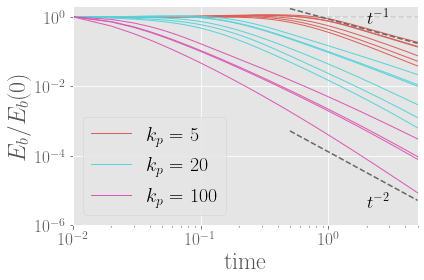

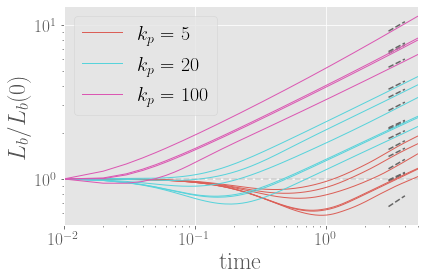

In [162]:
#produce time decay plots hardcoded 
fig, axE = plt.subplots()
figL, axL = plt.subplots()
p = []
q = []
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    if idx in [0,6,12]:
        axE.plot(time,B/B[1],c=colors[idx],lw=1,label= '$k_p$ = {}'.format(tags[idx]))
        axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='$k_p$ = {}'.format(tags[idx]))
    else:
        axE.plot(time,B/B[1],c=colors[idx],lw=1,label='__nolegend__')
        axL.plot(time,Lb/Lb[1],c=colors[idx],lw=1,label='__nolegend__')
    t_lines = np.array([3,3.5,4])
    
    y = np.power(t_lines,mp)*np.exp(bp)/B[1]*1.1
    #axE.plot(t_lines,y,ls='--',c='0.4')
    #axE.text(t_lines[1],y[1]*1.3,'{:.2f}'.format(mp),size=18)
    y = np.power(t_lines,mq)*np.exp(bq)/Lb[1]*1.03
    axL.plot(t_lines,y,ls='--',c='0.4')
    #axL.text(t_lines[1],y[1]*1.15,'{:.2f}'.format(mq),size=18)
   

    
t_lines = np.array([0.5,2,5])
    
y = np.power(t_lines,-1)*np.exp(bp)/B[1]*2e3
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1.5,'$t^{-1}$',size=18)
y = np.power(t_lines,-2)*np.exp(bp)/B[1]*3e-1
axE.plot(t_lines,y,ls='--',c='0.4')
axE.text(t_lines[1],y[1]*1e-1,'$t^{-2}$',size=18)

p = np.array(p)
q = np.array(q)

axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_b(0)$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/L_b(0)$',size = 24)
axL.set_xlabel('time',size = 24)
axE.legend(fontsize=20,loc=3)
axL.legend(fontsize=20,loc=2)

axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.8')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
axE.set_ylim(1e-6,2)
fig.tight_layout()
fig.savefig('Eb_vs_t_WN.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

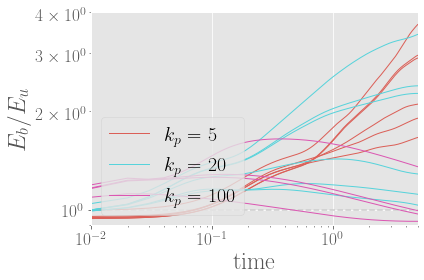

In [163]:
#produce time decay plots hardcoded 
figr, axr = plt.subplots()

p = []
q = []
for idx, f in enumerate(files):
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    E = Es[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[-200:]), np.log(B[-200:]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[-200:]), np.log(Lb[-200:]), 1)
    q.append(mq)
    if idx in [0,6,12]:
        axr.plot(time,B/E,c=colors[idx],lw=1,label= '$k_p$ = {}'.format(tags[idx]))
    else:
        axr.plot(time,B/E,c=colors[idx],lw=1,label='__nolegend__')
     
    t_lines = np.array([3,3.5,4])
    
   

    
t_lines = np.array([0.5,2,5])

p = np.array(p)
q = np.array(q)

axr.set_xscale('log')
axr.set_yscale('log')
axr.set_ylabel('$E_{b}/E_u$',size = 24)
axr.set_xlabel('time',size = 24)

axr.legend(fontsize=20,loc=3)
axr.hlines(1,1e-2,6,linestyles = '--',colors = '0.8')
axr.set_xlim(1e-2,5)
axr.set_ylim(9e-1,4)

figr.tight_layout()
#fig.savefig('Eb_vs_t_WN.pdf',format='pdf')
#figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


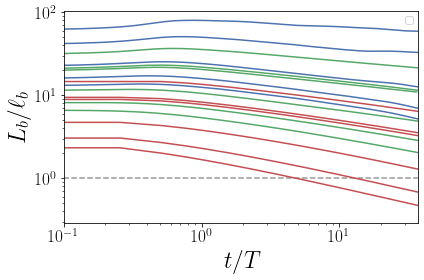

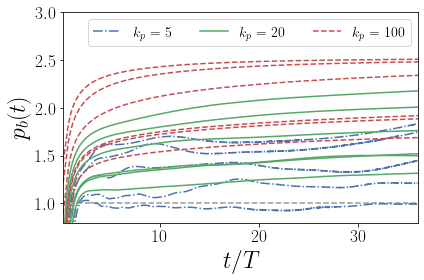

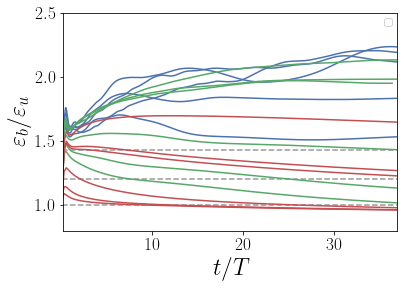

In [13]:
# n over time


figE, axE = plt.subplots()
fign, axn = plt.subplots()
figx,axx = plt.subplots()

#col_NH = sns.color_palette('hls',len(files))
Flag20 = True
Flag5 = True
Flag100 = True
for id_f,f in enumerate(files):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    kp= kps[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    linestyle  = linestyles[id_f]
   
    #rint('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f] 
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    if (kp == 5) and (Flag5 == True):
        label = '$k_p$ = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = '$k_p$ = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='$k_p$ = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    axE.plot(time/T[0], Lb/lb, color=colors[id_f])
    axn.plot(time[1:]/T[0],n, ls= linestyle,color=colors[id_f],label=label)
    axx.plot(time/T[0],epsb/epsu,color=colors[id_f])
axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$L_{b}/\ell_b$',size = 24)
axE.set_xlabel('$t/T$',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-1,37)

#axn.set_xscale('log')
#axn.set_yscale('log')
axn.set_ylabel('$p_b(t)$',size = 24)
axn.set_xlabel('$t/T$',size = 24)
axn.legend(fontsize=14,ncol=3)
axn.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(2e-1,36)
axn.set_ylim(0.8,3)

#axn.set_xscale('log')
#axn.set_yscale('log')
axx.set_ylabel('$\\varepsilon_b/\\varepsilon_u$',size = 24)
axx.set_xlabel('$t/T$',size = 24)
axx.legend(fontsize=10)
axx.hlines([1,10/7,6/5],1e-4,1e3,linestyles = '--',colors = '0.6')
axx.set_xlim(1e-1,37)
axx.set_ylim(0.8,2.5)

figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
fign.tight_layout()
fign.savefig('pb_vs_t_kpRe.pdf',format='pdf')

plt.show()

In [9]:
t_T_select = 25

T0s = []
id_t_T = []
for idx, f in enumerate(files):
    Lu = Lus[idx]
    U = Us[idx]
    T0s.append(Lu[0]/U[0])
np.array(T0s)

for idx, f in enumerate(files):
    time = times[idx]
    T0 = T0s[idx]
    for id_t, t_T in enumerate(time/T0):
        if t_T > t_T_select:
            id_t_T.append(id_t)
            break


t_T_select = 20            
id_t_Tinf = []

for idx, f in enumerate(files):
    time = times[idx]
    T0 = T0s[idx]

    for id_t, t_T in enumerate(time/T0):
        if t_T > t_T_select:
            id_t_Tinf.append(id_t)
            break

tlims = []
for idx, _id_t_T in enumerate(id_t_T):
    tlims.append([id_t_Tinf[idx],_id_t_T])
    
tlims

[[1560, 1950],
 [1560, 1950],
 [1560, 1950],
 [1560, 1950],
 [1560, 1950],
 [390, 488],
 [390, 488],
 [390, 488],
 [390, 488],
 [390, 488],
 [390, 488],
 [78, 98],
 [78, 98],
 [78, 98],
 [78, 98],
 [78, 98],
 [78, 98]]

kp = 5.0     , visc = 0.0004 	 p = 0.93 	 q = 0.34
kp = 5.0     , visc = 0.006 	 p = 1.55 	 q = 0.37
kp = 5.0     , visc = 0.0009 	 p = 1.19 	 q = 0.53
kp = 5.0     , visc = 0.003 	 p = 1.37 	 q = 0.45
kp = 5.0     , visc = 0.009 	 p = 1.66 	 q = 0.35
kp = 20.0    , visc = 0.006 	 p = 1.94 	 q = 0.44
kp = 20.0    , visc = 0.003 	 p = 1.71 	 q = 0.43
kp = 20.0    , visc = 0.0009 	 p = 1.45 	 q = 0.39
kp = 20.0    , visc = 0.0004 	 p = 1.26 	 q = 0.40
kp = 20.0    , visc = 0.001 	 p = 1.45 	 q = 0.41
kp = 20.0    , visc = 0.009 	 p = 2.10 	 q = 0.46
kp = 100.0   , visc = 0.001 	 p = 1.86 	 q = 0.43
kp = 100.0   , visc = 0.003 	 p = 2.27 	 q = 0.46
kp = 100.0   , visc = 0.0009 	 p = 1.83 	 q = 0.43
kp = 100.0   , visc = 0.006 	 p = 2.45 	 q = 0.48
kp = 100.0   , visc = 0.0004 	 p = 1.64 	 q = 0.41
kp = 100.0   , visc = 0.009 	 p = 2.49 	 q = 0.49


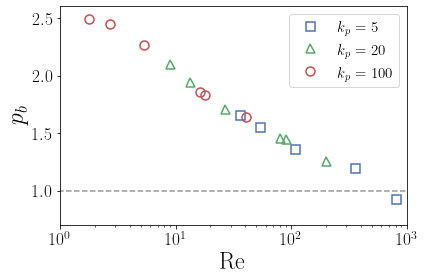

In [13]:
#plt.style.use('ggplot')
fig,ax = plt.subplots()
p_colors = sns.cubehelix_palette(4)

    
p = []
q = []
ti = 350
Res = []
Flag5 = True
Flag20 = True
Flag100 = True
for idx, f in enumerate(files):
    #f idx == 0:
    #    continue
    Bk = Bks[idx]
    visc = viscs[idx]
    Va = Vas[idx]
    U = Us[idx]
    Lu = Lus[idx]
    Re = Lu[0]*U[0]/visc
    Res.append(Re)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    kp = kps[idx]
    marker = markers[idx]
    _tlims = tlims[idx]
    mp, bp = np.polyfit(np.log(time[_tlims[0]:_tlims[1]]), np.log(B[_tlims[0]:_tlims[1]]), 1)
    p.append(mp)
    mq, bq = np.polyfit(np.log(time[_tlims[0]:_tlims[1]]), np.log(Lb[_tlims[0]:_tlims[1]]), 1)
    q.append(mq)
    print('kp = {:<8}, visc = {} \t p = {:.2f} \t q = {:.2f}'.format(kp,visc,-mp,mq))
    
    col = colors[idx]
    if (kp == 5) and (Flag5 == True):
        label = '$k_p$ = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        label = '$k_p$ = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        label ='$k_p$ = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    ax.plot(Re, -mp,marker = marker,linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col,label= label)
    
        #ax.plot(Pms, q,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = 'goldenrod',label = '{:<}    {:>}'.format('$q$','hel'))
p = np.array(p)
q = np.array(q)

poptNH,pcovNH = curve_fit(dns.fitm8,Res,-p)

x_Res = np.linspace(1,1e3,1000)
#ax.plot(x_Res, dns.fitm8(x_Res,poptNH[0],poptNH[1]),color='0.7',ls='--')
ax.set_xscale('log',basex=10)
ax.set_ylabel('$p_b$',size = 24)
ax.set_xlabel('Re',size = 24)
ax.legend(loc=1,fontsize=15)
x_lims = ax.get_xlim()
ax.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
ax.set_xlim(1,1e3)
ax.set_ylim(0.7,2.6)
fig.tight_layout()
fig.savefig('p_vs_kpRe_paper.pdf',format='pdf')
plt.show()



In [ ]:
# n over time


#figE, axE = plt.subplots()
#fign, axn = plt.subplots()
#figx,axx = plt.subplots()

#col_NH = sns.color_palette('hls',len(files))
Flag20 = True
Flag5 = True
Flag100 = True
for id_f,f in enumerate(files):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    kp= kps[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    linestyle  = linestyles[id_f]
   
    #rint('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f] 
    n = -np.gradient(np.log(B[1:]),np.log(time[1:]))
    if (kp == 5) and (Flag5 == True):
        label = 'kp = {:>}'.format(int(kp))
        Flag5=False
    elif (kp==20) and (Flag20 ==True):
        continue
        label = 'kp = {:>}'.format(int(kp))
        Flag20 =False
    elif (kp==100) and (Flag100 == True):
        continue
        label ='kp = {:>}'.format(int(kp))
        Flag100=False
    else:
        label = '__nolegend__'
    #axE.plot(time/T[0], Lb/lb, color=colors[id_f])
    axn.plot(time[1:]/T[0],n, ls= linestyle,color=colors[id_f],label=label)
    #axx.plot(time/T[0],epsb/epsu,color=colors[id_f])
#axE.set_xscale('log')
#axE.set_yscale('log')
#axE.set_ylabel('$L_{b}/\ell_b$',size = 24)
#axE.set_xlabel('$t/T$',size = 24)
#axE.legend(fontsize=10)
#axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
#axE.set_xlim(1e-1,37)

#axn.set_xscale('log')
#axn.set_yscale('log')
axn.set_ylabel('$p_b(t)$',size = 24)
axn.set_xlabel('$t/T$',size = 24)
axn.legend(fontsize=12,ncol=3)
axn.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axn.set_xlim(2e-1,36)
axn.set_ylim(0.8,3)

#axn.set_xscale('log')
#axn.set_yscale('log')
#axx.set_ylabel('$\\varepsilon_b/\\varepsilon_u$',size = 24)
#axx.set_xlabel('$t/T$',size = 24)
#axx.legend(fontsize=10)
#axx.hlines([1,10/7,6/5],1e-4,1e3,linestyles = '--',colors = '0.6')
#axx.set_xlim(1e-1,37)
#axx.set_ylim(0.8,2.5)

figE.tight_layout()
#figE.savefig('Eb_vs_t_DNS.pdf',format='pdf')
fign.tight_layout()
#fign.savefig('pb_vs_t_kpRe.pdf',format='pdf')

plt.show()

# We can set Re(0) from the start using $\dfrac{2(2E_{uo}/3)^{1/2}}{k_p\nu}$